In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})
sns.set(color_codes=True)
from scipy import stats

In [2]:
# read the large csv file with specified chunksize 
df_chunk = pd.read_csv('data/btc_final.csv', chunksize=50000)

In [3]:
chunk_list = []  # append each chunk df here 

# Each chunk is in df format
for chunk in df_chunk:  
    # (optional) --> perform data filtering 
    #chunk_filter = chunk_preprocessing(chunk)
    
    # Once the data filtering is done, append the chunk to list
    chunk_list.append(chunk)
    
# concat the list into dataframe 
df = pd.concat(chunk_list)

## EDA

In [4]:
df.shape

(585371, 28)

In [5]:
df.columns.values

array(['Unnamed: 0', 'has_media', 'hashtags', 'img_urls', 'is_replied',
       'is_reply_to', 'likes', 'links', 'parent_tweet_id', 'replies',
       'reply_to_users', 'retweets', 'screen_name', 'text', 'text_html',
       'timestamp', 'timestamp_epochs', 'tweet_id', 'tweet_url',
       'user_id', 'username', 'video_url', 'date', 'Bitcoin', 'BTC',
       'isPartial', 'date_vcrix', 'vcrix'], dtype=object)

In [6]:
df.describe()

,Unnamed: 0,likes,parent_tweet_id,replies,retweets,tweet_id,user_id,video_url,Bitcoin,BTC,vcrix
count,585371.00000,585371.000000,5.147000e+04,585371.000000,585371.000000,5.853710e+05,5.853710e+05,0.0,585371.000000,585371.000000,585371.000000
mean,292685.00000,3.787188,1.239244e+18,0.772257,1.240965,1.239702e+18,6.883736e+17,NaN,62.998092,17.607387,981.806465
std,168982.19655,40.434736,2.841713e+16,18.784413,24.105328,1.592181e+16,4.992147e+17,NaN,21.642594,6.279776,584.361684
min,0.00000,0.000000,1.110303e+09,0.000000,0.000000,1.212162e+18,3.147000e+03,NaN,0.000000,0.000000,509.948083
25%,146342.50000,0.000000,1.226167e+18,0.000000,0.000000,1.225889e+18,2.394249e+09,NaN,54.000000,15.000000,676.500591
50%,292685.00000,0.000000,1.240634e+18,0.000000,0.000000,1.239606e+18,9.441082e+17,NaN,66.000000,19.000000,707.650579
75%,439027.50000,1.000000,1.255372e+18,0.000000,0.000000,1.253662e+18,1.087661e+18,NaN,77.000000,21.000000,809.705581
max,585370.00000,10112.000000,1.266878e+18,7992.000000,8585.000000,1.266882e+18,1.266871e+18,NaN,100.000000,100.000000,2324.458014


In [7]:
df["timestamp"] = pd.to_datetime(df["timestamp"])

### Publishing bevavior

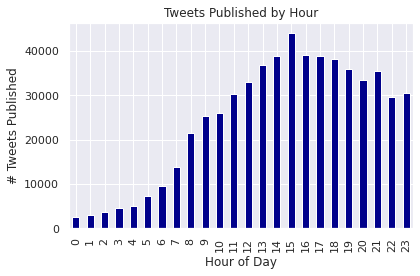

In [8]:
tweets_by_hour_plt = df['timestamp'].groupby(df["timestamp"].dt.hour).count().plot(kind="bar", title='Tweets Published by Hour', color='darkblue')
tweets_by_hour_plt.set_xlabel("Hour of Day")
tweets_by_hour_plt.set_ylabel("# Tweets Published")
plt.savefig('plots/dist_tweets_by_hour.png', transparent=True)

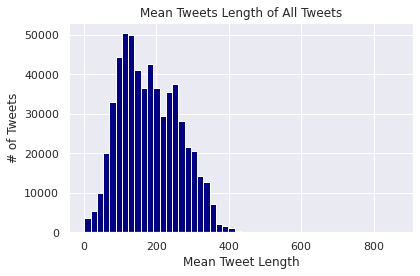

In [9]:
# Length of tweets 
ax = sns.distplot(df['text'].str.len(), kde=False, color='darkblue', hist_kws=dict(alpha=1))
ax.set(xlabel='Mean Tweet Length', ylabel='# of Tweets')
ax.set_title('Mean Tweets Length of All Tweets') 
ax
plt.savefig('plots/dist_tweets_length.png', transparent=True)

In [10]:
# plot google trends trump side by side

In [11]:

# Ratings dist